In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data and view
df = pd.read_csv('/Users/dgitahi/Documents/nano degree/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Comparison of Patients with other diseases and those without, on their chance of getting a stroke

#### Heart Disease patients

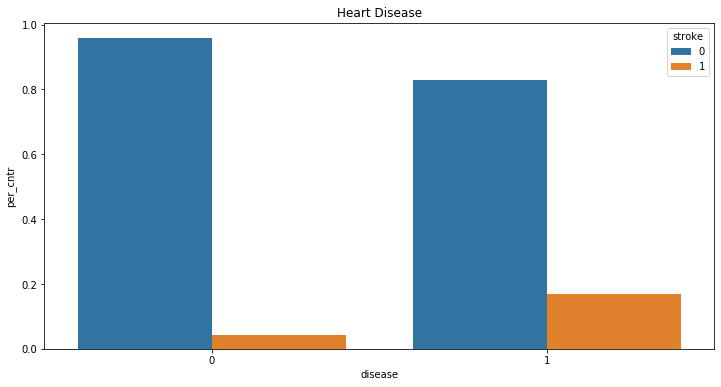

In [3]:
df_heartdisease =pd.DataFrame({'stroke':[1,1,0,0],'disease':[1,0,1,0],
                  'per_cntr':[df[df.heart_disease==1].groupby('stroke')['id'].count()[1]/df[df.heart_disease==1].shape[0],
                              df[df.heart_disease==0].groupby('stroke')['id'].count()[1]/df[df.heart_disease==0].shape[0],
                              df[df.heart_disease==1].groupby('stroke')['id'].count()[0]/df[df.heart_disease==1].shape[0],
                              df[df.heart_disease==0].groupby('stroke')['id'].count()[0]/df[df.heart_disease==0].shape[0]]})


plt.figure(figsize=(12,6))
plt.title('Heart Disease')
sns.barplot(x='disease',y='per_cntr',hue ='stroke',data=df_heartdisease)

plt.show()

The percentage of patients with stroke is relatively higher in the group of patients with heart disease(17%) compared to those without hear disease(3%)

#### Hypertension

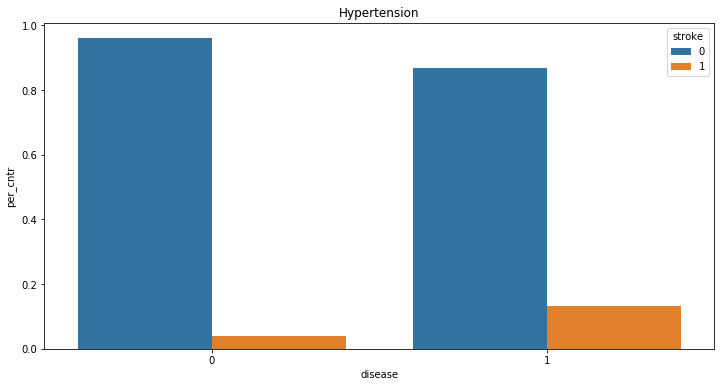

In [4]:
df_hypertension =pd.DataFrame({'stroke':[1,1,0,0],'disease':[1,0,1,0],
                  'per_cntr':[df[df.hypertension==1].groupby('stroke')['id'].count()[1]/df[df.hypertension==1].shape[0],
                              df[df.hypertension==0].groupby('stroke')['id'].count()[1]/df[df.hypertension==0].shape[0],
                              df[df.hypertension==1].groupby('stroke')['id'].count()[0]/df[df.hypertension==1].shape[0],
                              df[df.hypertension==0].groupby('stroke')['id'].count()[0]/df[df.hypertension==0].shape[0]]})


plt.figure(figsize=(12,6))
plt.title('Hypertension')
sns.barplot(x='disease',y='per_cntr',hue ='stroke',data=df_hypertension)

plt.show()

The percentage of patients with stroke is relatively higher in the group of patients with hypertension(13.2%) compared to those without hypertension(3%)

We can therefore conclude that the patient with ohter diseaseses e.g hypertension and heardisease are more susceptible to getting stroke.

 A patient with either hypertension or heart disease has a higher chance of having stroke than a patient without the disese

#### Both Heart Disease and Hypertension 

In [5]:
both_heart_hypertension = []
for i in range(0,len(df)):
    if df.hypertension.iloc[i] ==1 & df.heart_disease.iloc[i] ==1:
        both_heart_hypertension.append(1)
    else:
        both_heart_hypertension.append(0)
        
df['both_heart_hypertension'] = both_heart_hypertension

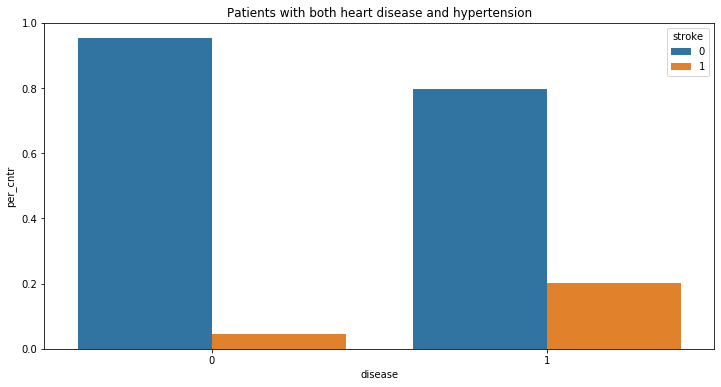

In [6]:
df_heart_hypertension =pd.DataFrame({'stroke':[1,1,0,0],'disease':[1,0,1,0],
                  'per_cntr':[df[df.both_heart_hypertension==1].groupby('stroke')['id'].count()[1]/df[df.both_heart_hypertension==1].shape[0],
                              df[df.both_heart_hypertension==0].groupby('stroke')['id'].count()[1]/df[df.both_heart_hypertension==0].shape[0],
                              df[df.both_heart_hypertension==1].groupby('stroke')['id'].count()[0]/df[df.both_heart_hypertension==1].shape[0],
                              df[df.both_heart_hypertension==0].groupby('stroke')['id'].count()[0]/df[df.both_heart_hypertension==0].shape[0]]})


plt.figure(figsize=(12,6))
plt.title('Patients with both heart disease and hypertension')
sns.barplot(x='disease',y='per_cntr',hue ='stroke',data=df_heart_hypertension)

plt.show()

The chance increases further,for the patients with both hypertension and heart disease, 20% have got stroke while for those with either the condition or none at all 4% have stroke

We could therefore conclude that having either the heartdisease or hypertension increases your chance of getting stroke.For those with both condition their chance of getting stroke is even higher